**Atividade Aquecimento global**

**Nome:** Lais de Figueiredo Maia - 2016034704

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import math

**1 - Descargue as duas tabelas de dados no repositorio. Para a tabela de paleo-temperaturas estime a inclinação da curva para o máximo que começa em  −16.000  anos e estime a taxa de crescimento da temperatura como função do tempo.**

In [2]:
#leitura dos dados das eras, que está na coluna 3 da tabela de paleo-temperatura, corresponde aos anos depois de 1950:
age = np.loadtxt('edc3deuttemp2007.txt', comments='%', usecols=2)

#leitura dos dados de temperatura, que está na coluna 5 da tabela de paleo-temperatura: 
Temperature = np.loadtxt('edc3deuttemp2007.txt', comments='%', usecols=4)

Text(0.5, 1.0, 'Anomalia da temperatura em função do tempo')

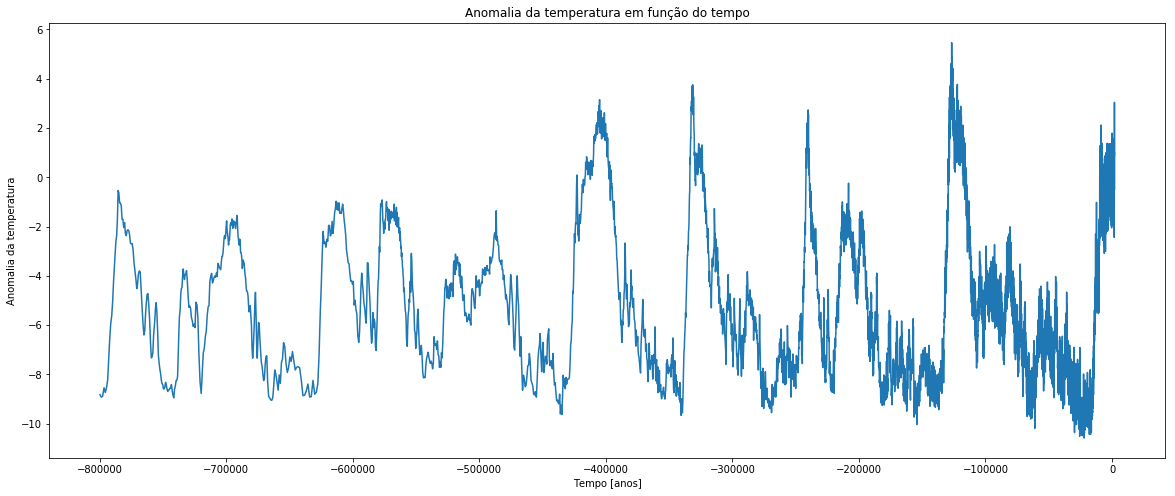

In [3]:
ano = 1950-age

#gráfico da temperatura em função do tempo em anos:
plt.figure(figsize=(20,8))
plt.plot(ano,Temperature)
plt.ylabel('Anomalia da temperatura')
plt.xlabel('Tempo [anos]')
plt.title('Anomalia da temperatura em função do tempo')

In [4]:
# Esta função calcula todas as somas para calcular a0, a1 e R2
def sums(dados):
    [X,Y,XX,YY,XY] = [0.0,0.0,0.0,0.0,0.0]
    for p in dados:
        X += p[0]
        Y += p[1]
        XX += pow(p[0],2.0)
        YY += pow(p[1],2.0)
        XY += p[0]*p[1]
    return [X,Y,XX,YY,XY]

# função que calcula os coeficientes para o ajuste linear de mínimos quadrados

def linear_lsf(dados,**args):
    [X,Y,XX,YY,XY] = sums(dados)
    m = len(dados)
    a0 = (Y*XX-X*XY)/(m*XX-X*X)
    a1 = (m*XY-X*Y)/(m*XX-X*X)    
    return a0,a1

def linear_f(x):
    a0,a1 = linear_lsf(dados)
    return a0+a1*x

## funcion que calcula el coeficiente de correlación
def R2(dados):
    import math as mt
    [X,Y,XX,YY,XY] = sums(dados)
    m = len(dados)
    return (m*XY-X*Y)/(mt.sqrt((m*XX-X*X)*(m*YY-Y*Y)))

In [5]:
#loop que gera um conjunto dos dados dos anos >= -16000 e suas pespectivas temperaturas
dados = []
for i, elem in enumerate(ano):
    if elem >= -16000:
        temp = Temperature[i]
        dados.append((elem, temp))

In [6]:
a0, a1 = linear_lsf(dados)
r2 = R2(dados) # coeficiente de correlacao
print('a_0 = ', a0)
print('a_1 (inclinação da curva)= ', a1)
print('R^2 = ', r2)
x = np.linspace(-16000,4000,100)
y = linear_f(x) # modelo lineal


a_0 =  0.5831294372659154
a_1 (inclinação da curva)=  0.00035981141420014665
R^2 =  0.7572202423942991


Text(0.5, 1.0, 'Temperatura em função do tempo para anos >= -16000')

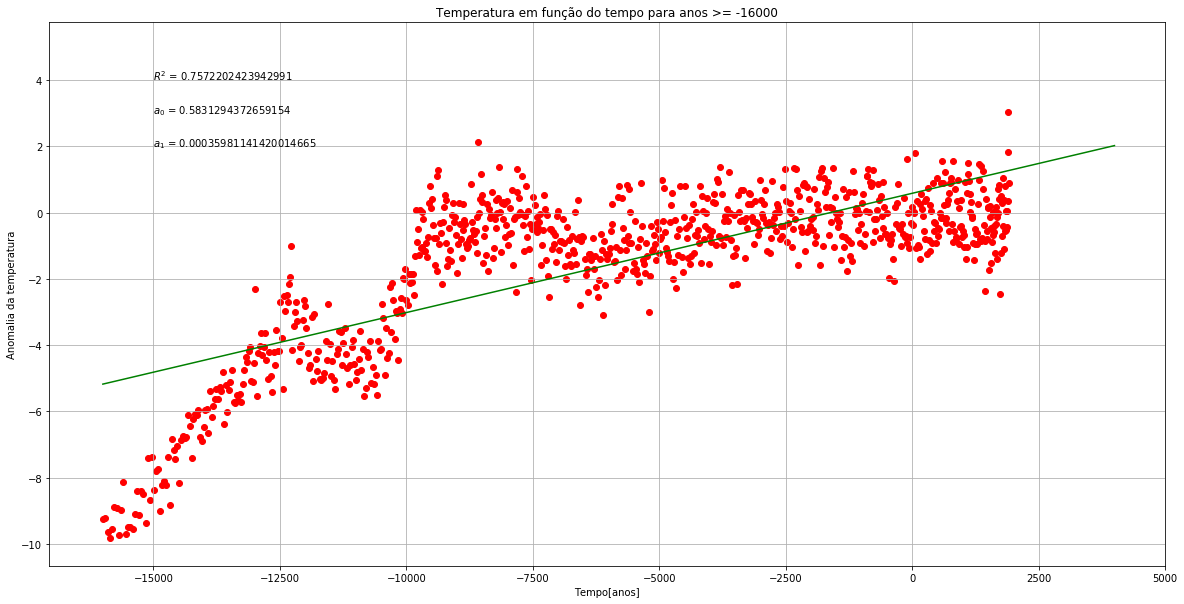

In [7]:
# Grafico das temperaturas correspondente ao anos >= -16000 e a reta de linearização dos dados
plt.figure(figsize=(20,10))
plt.text(-15000,4,r'$R^2$ = '+str(r2))
plt.text(-15000,3,r'$a_0$ = '+str(a0))
plt.text(-15000,2,r'$a_1$ = '+ str(a1))
plt.plot(x, y,'g', 30, 5)
plt.xlabel('Tempo[anos]')
plt.ylabel('Anomalia da temperatura')
for p in dados:
    plt.scatter(p[0],p[1],c='r')
plt.grid(True)
plt.title('Temperatura em função do tempo para anos >= -16000')

In [8]:
#taxa de crescimento da Temperatura em função do tempo em anos(para >=-16000):
# delta(x) = [x(final) - x(inicial)]/[x(inicial)]
# variação = delta(y)/delta(x)

del_ano = (dados[0][0] - dados[len(dados) -1][0])/(dados[len(dados) -1][0])
del_temp = (dados[0][1] - dados[len(dados) -1][1])/(dados[len(dados) -1][1])

var = del_temp/del_ano
var = var/100
print("A taxa de crescimento da temperatura é de cerca de", round(var, 4), "% ao ano.")

A taxa de crescimento da temperatura é de cerca de 0.0098 % ao ano.


**2 - Faça o mesmo para a tabela de dados com medidas diretas de temperatura estimando a mesma taxa para temperaturas a partir de 1850, e começando a partir de 1950.**

In [9]:
anomalia = np.loadtxt('Complete_TAVG_complete.txt', comments='%', usecols=4)

ano_anomalia = np.loadtxt('Complete_TAVG_complete.txt', comments='%', usecols=0)


In [10]:
#loop que gera um conjunto dos dados dos anos >=1850 e suas pespectivas temperaturas
dados = []
for i, elem in enumerate(ano_anomalia):
    if elem >= 1850:
        temp2 = anomalia[i]
        if not math.isnan(temp2):
            dados.append((elem, temp2))

In [11]:
a0, a1 = linear_lsf(dados)
r2 = R2(dados) # coeficiente de correlacao
print('a_0 = ', a0)
print('a_1 (inclinação da curva)= ', a1)
print('R^2 = ', r2)
x = np.linspace(1850,2025,100)
y = linear_f(x) # modelo lineal


a_0 =  -17.914897885055257
a_1 (inclinação da curva)=  0.009223108195558938
R^2 =  0.8794848569898839


Text(0.5, 1.0, 'Temperatura em função do tempo para anos >= 1850')

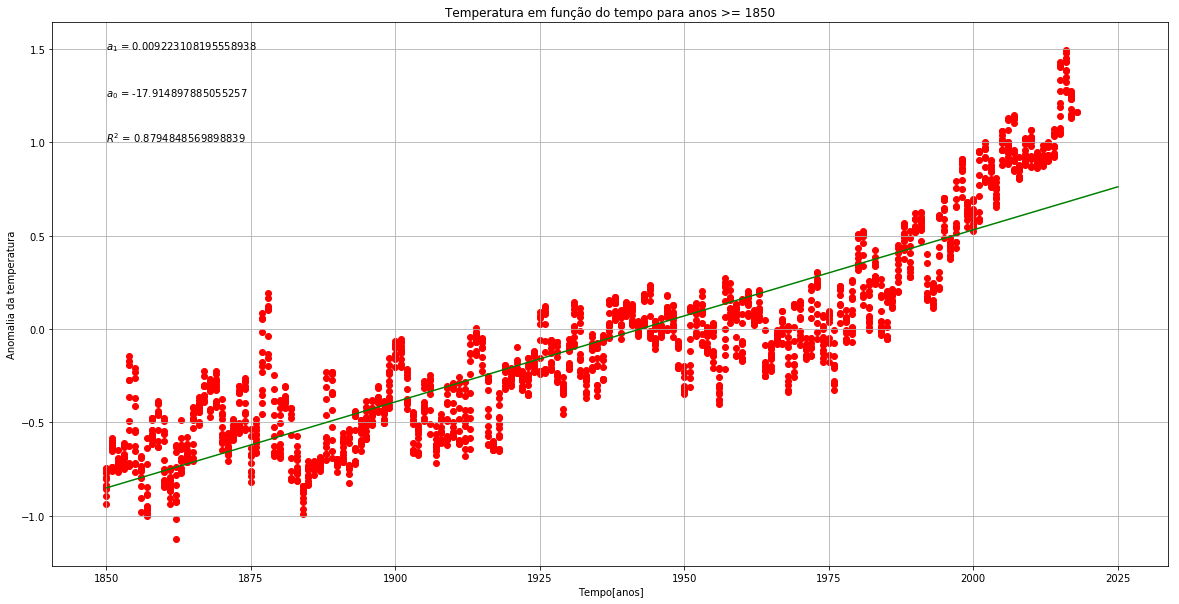

In [12]:
# Grafico das temperaturas correspondente ao anos >=1850 e a reta de linearização dos dados
plt.figure(figsize=(20,10))
plt.text(1850,1,r'$R^2$ = '+str(r2))
plt.text(1850,1.25,r'$a_0$ = '+str(a0))
plt.text(1850,1.5,r'$a_1$ = '+ str(a1))
plt.plot(x, y,'g')
plt.xlabel('Tempo[anos]')
plt.ylabel('Anomalia da temperatura')
for p in dados:
    plt.scatter(p[0],p[1],c='r')
plt.grid(True)
plt.title('Temperatura em função do tempo para anos >= 1850')

In [13]:
#taxa de crescimento da Temperatura em função do tempo em anos(para >=1850):
# delta(x) = [x(final) - x(inicial)]/[x(inicial)]
# variação = delta(y)/delta(x)

del_ano1850 = (dados[0][0] - dados[len(dados) -1][0])/(dados[len(dados) -1][0])
del_temp1850 = (dados[0][1] - dados[len(dados) -1][1])/(dados[len(dados) -1][1])

var2 = del_temp1850/del_ano1850
var2 = var2/100
print("A taxa de crescimento da temperatura a partir do ano de 1850 é de cerca de", round(var2, 4),"% ao ano.")

A taxa de crescimento da temperatura a partir do ano de 1850 é de cerca de 0.2068 % ao ano.


In [14]:
#loop que gera um conjunto dos dados dos anos >=1950 e suas pespectivas temperaturas
dados = []
for i, elem in enumerate(ano_anomalia):
    if elem >= 1950:
        temp2 = anomalia[i]
        if not math.isnan(temp2):
            dados.append((elem, temp2))
            

In [15]:
a0, a1 = linear_lsf(dados)
r2 = R2(dados) # coeficiente de correlacao
print('a_0 = ', a0)
print('a_1 (inclinação da curva)= ', a1)
print('R^2 = ', r2)
x = np.linspace(1950,2020,100)
y = linear_f(x) # modelo lineal

a_0 =  -39.20530877338666
a_1 (inclinação da curva)=  0.019946561124332633
R^2 =  0.8931155614631935


Text(0.5, 1.0, 'Temperatura em função do tempo para anos >= 1950')

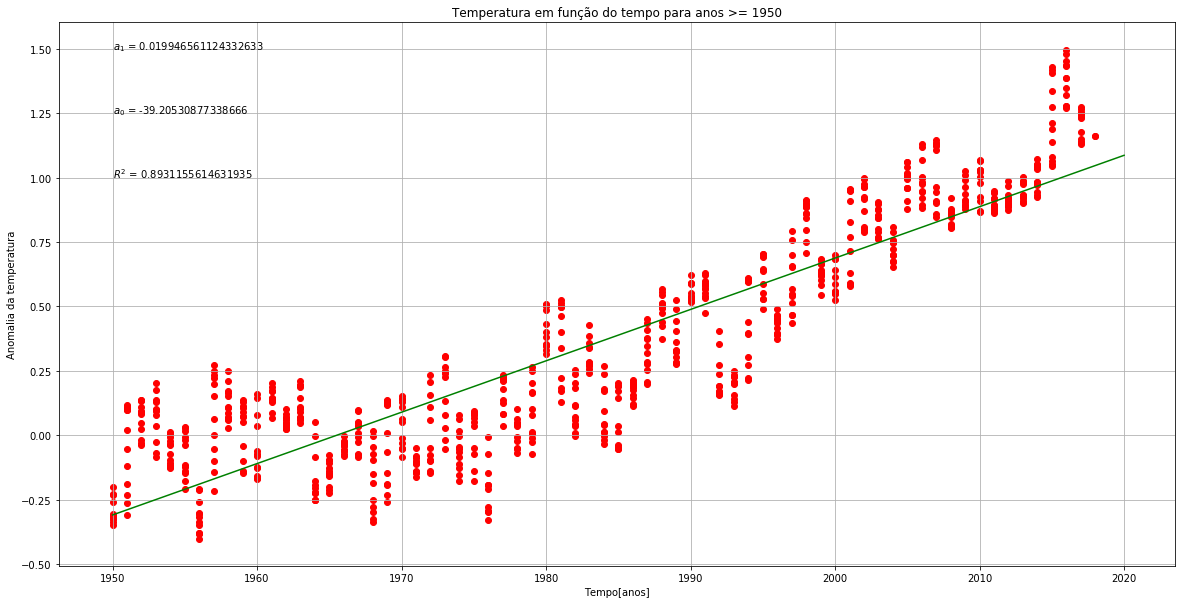

In [16]:
# Grafico do resultado para ano >=1950
plt.figure(figsize=(20,10))
plt.text(1950,1,r'$R^2$ = '+str(r2))
plt.text(1950,1.25,r'$a_0$ = '+str(a0))
plt.text(1950,1.5,r'$a_1$ = '+ str(a1))
plt.plot(x, y,'g')
plt.xlabel('Tempo[anos]')
plt.ylabel('Anomalia da temperatura')
for p in dados:
    plt.scatter(p[0],p[1],c='r')
plt.grid(True)
plt.title('Temperatura em função do tempo para anos >= 1950')

In [17]:
#taxa de crescimento da Temperatura em função do tempo em anos(para >=1950):
# delta(x) = [x(final) - x(inicial)]/[x(inicial)]
# variação = delta(y)/delta(x)

del_ano1950 = (dados[0][0] - dados[len(dados) -1][0])/(dados[len(dados) -1][0])
del_temp1950 = (dados[0][1] - dados[len(dados) -1][1])/(dados[len(dados) -1][1])

var3 = del_temp1950/del_ano1950
var3 = var3/100
print("A taxa de crescimento da temperatura a partir do ano de 1950 é de cerca de", round(var3, 4),"% ao ano.")

A taxa de crescimento da temperatura a partir do ano de 1950 é de cerca de 0.3481 % ao ano.


**4 - Em uma unica figura compare a anomalia de temperatura como função do tempo e a concentração de CO2 como função do tempo. Utilize os dados que se encontram en data/co2_mm_mlo.txt. Por fim, encontre o índice de correlação entre a anomalia de temperatura e a concetração de CO2.**

Text(0.5, 1.0, 'Anomalia da temperatura em função do tempo de 1750 a 2018')

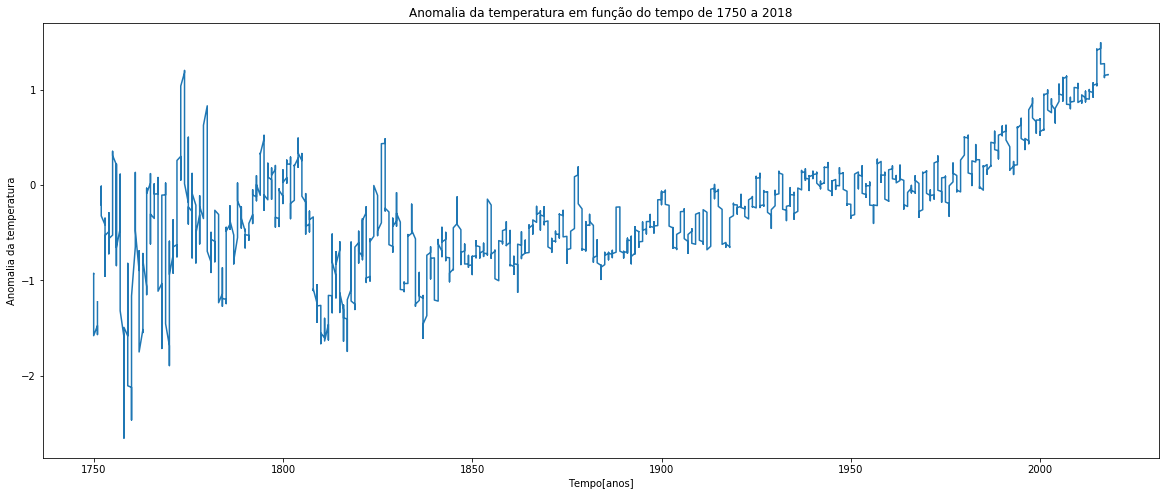

In [18]:
#gráfico anomalia em função do tempo de 1750 a 2018
plt.figure(figsize=(20,8))
plt.plot(ano_anomalia, anomalia, '-')
plt.xlabel('Tempo[anos]')
plt.ylabel('Anomalia da temperatura')
plt.title('Anomalia da temperatura em função do tempo de 1750 a 2018')

Text(0.5, 1.0, 'Concentração de CO2 em função do tempo de 1958 a 2018')

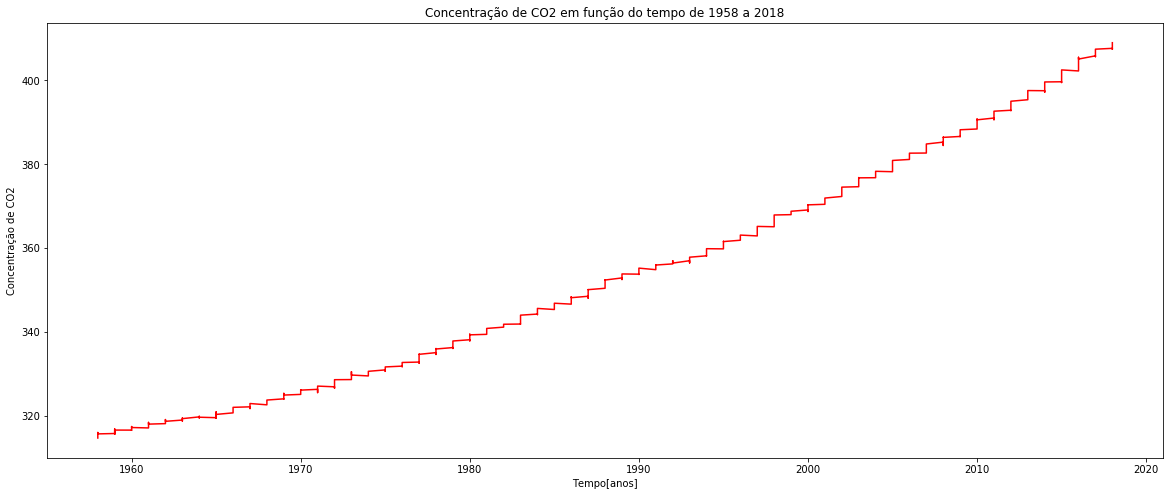

In [19]:
#leitura dos dados de tempo, que está na coluna 1 da tabela de CO2: 
date = np.loadtxt('co2_mm_mlo.txt', usecols=0)

#leitura dos dados de concentração de CO2, que está na coluna 6 da tabela de CO2: 
cO2 = np.loadtxt('co2_mm_mlo.txt', usecols=5)

#gráfico da concentração de CO2 em função do tempo de 1958 a 2018:
plt.figure(figsize=(20,8))
plt.plot(date, cO2, 'r')
plt.ylabel('Concentração de CO2')
plt.xlabel('Tempo[anos]')
plt.title('Concentração de CO2 em função do tempo de 1958 a 2018')

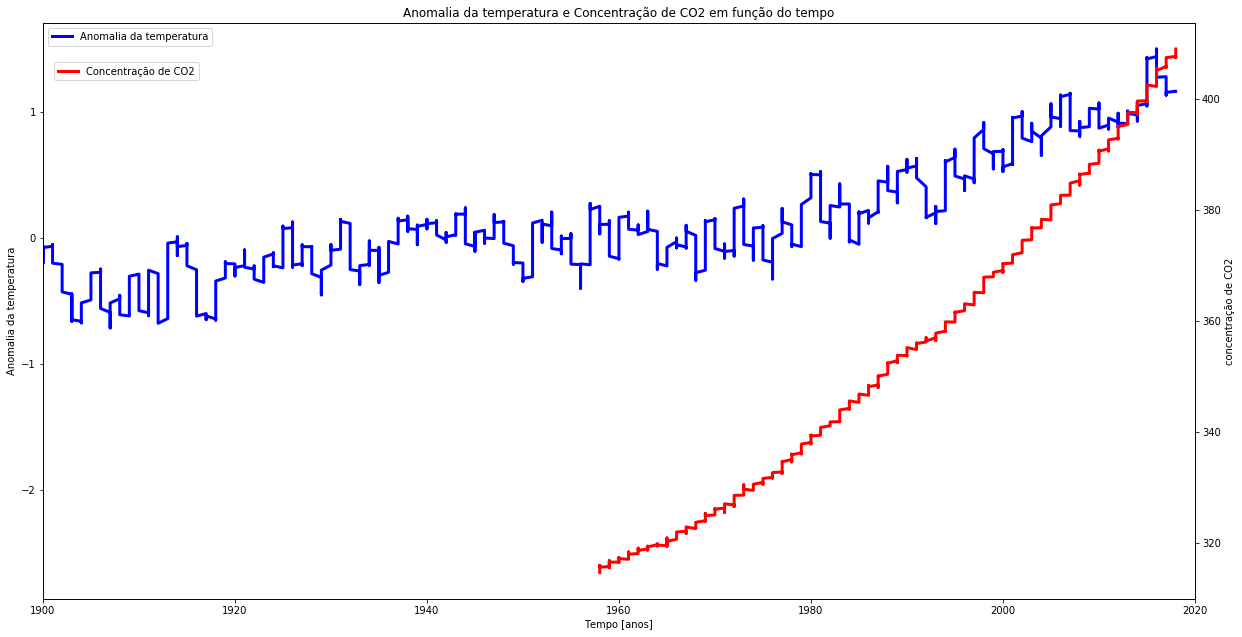

In [20]:
#Gráfico da Anomalia da temperatura e Concentração de C02 em função do tempo:

fig = plt.figure(figsize=(20,10))

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes1.plot(ano_anomalia, anomalia, 'b' ,lw=3, ls='-', label='Anomalia da temperatura')
axes1.set_ylabel('Anomalia da temperatura')
axes1.set_title('Anomalia da temperatura e Concentração de CO2 em função do tempo')
axes1.set_xlabel('Tempo [anos]')
axes1.set_xlim(1900,2020)

axes2 = axes1.twinx()
axes2.plot(date, cO2, 'r', lw=3, ls='-', label='Concentração de CO2')
axes2.set_ylabel('concentração de CO2')
axes1.legend(loc=2)
axes2.legend(loc=(0.01,0.9))


In [21]:
#loop que gera um conjunto dos dados da concentração de CO2 e seus respectivos anos
ano_cO2 = []
for i, elem in enumerate(date):
        temp4 = cO2[i]
        ano_cO2.append((elem, temp4))
        #ano_cO2.append((temp4))    

In [22]:
#loop que gera um conjunto das temperaturas correspondentes ao anos >=1950
temps_do_ano_maior1958 = []
for i, elem in enumerate(ano_anomalia):
    if elem >= 1958:
        temp3 = anomalia[i]
        if not math.isnan(temp3):
            temps_do_ano_maior1958.append((elem,temp3))
            #temps_do_ano_maior1958.append((temp3))
        

In [23]:
#loop que gera um conjunto dos dados da Anomalia da temperatura em função da concentração de CO2
dados = []
for i in range(len(ano_cO2)): 
    a = [ano_cO2[i][0]]

for i in range(len(temps_do_ano_maior1958)):
    b = [temps_do_ano_maior1958[i][0]]
    c = ano_cO2[i][1]
    d = temps_do_ano_maior1958[i][1]
    dados.append((c,d))

In [26]:
a0, a1 = linear_lsf(dados)
r2 = R2(dados) # coeficiente de correlacao entre a Anomalia da temperatura e a concentração de CO2
print('R^2 = ', r2)
print('a_0 = ', a0)
print('a_1 (inclinação da curva)= ', a1)
x = np.linspace(310,410)
y = linear_f(x) # modelo lineal


R^2 =  0.9280989206693762
a_0 =  -4.811446608302063
a_1 (inclinação da curva)=  0.014803949518772447


Text(0.5, 1.0, 'Anomalia da temperatura em função da concentração de CO2')

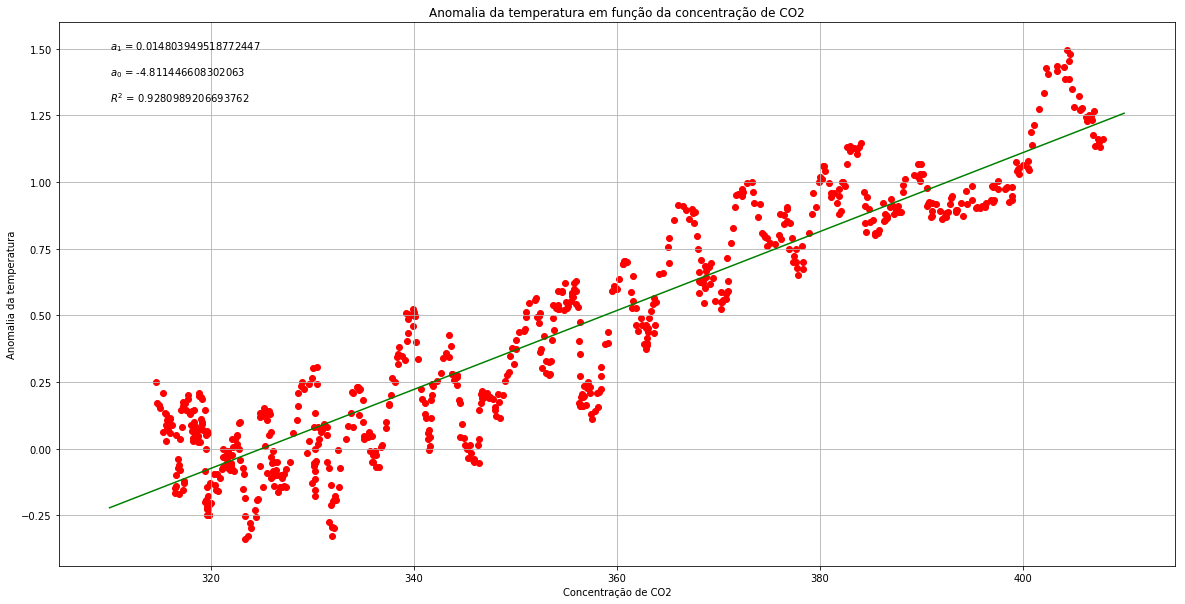

In [30]:
# Grafico da Anomalia da temperatura em função da concentração de CO2 e a reta de linearização dos dados
plt.figure(figsize=(20,10))
plt.text(310,1.30,r'$R^2$ = '+str(r2))
plt.text(310,1.40,r'$a_0$ = '+str(a0))
plt.text(310,1.50,r'$a_1$ = '+ str(a1))
plt.plot(x, y,'g')
plt.xlabel('Concentração de CO2')
plt.ylabel('Anomalia da temperatura')
for p in dados:
    plt.scatter(p[0],p[1],c='r')
plt.grid(True)
plt.title('Anomalia da temperatura em função da concentração de CO2')

A partir dos dados obtidos pelas análises anteriores é possível notar que ocorreu um aumento significativo na taxa de crescimento da temperatura da Terra a partir dos anos de 1850. Esse período coincide o surgimento da Revolução Industrial, eṕoca em que houve uma urbanização e desflorestamento desenfreado e também um grande aumento de números de fábricas e, consequentemente, aumento da emissão de gases do efeito estufa. 

Analisando a partir do ano de 1950, percebe-se que há um aumento ainda maior da temperatura, assim como há um aumento da concentração de CO2 na atmosfera nesse período, ocasionado principalmente pela emissão antropogência. Os dados obtidos demonstraram essa relação linear do aumento da temperatura com o aumento do CO2 e a relação é muito boa, já que o coeficiente de correlacao é 0.9. 

Desse modo, nota-se que apesar  da variação da temperatura terrestre está relacionada a ciclos naturais e tendências na órbita da Terra, como a atividade solar, a composição química da atmosfera, a circulação oceânica, a biosfera, dentre outros, a interferência humana no planeta está diretamente relacionada à um aumento considerável da temperatura da Terra. 